# Air Quality Forecasting

## 1. Setup and Imports


In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from src.data_utils import *
from src.model_utils import *

sns.set_style('whitegrid')

## 2. Data Preparation Pipeline


In [2]:
# Load, clean, and add features
df = load_data('../data/train.csv')
df = handle_missing_values(df)
df = create_time_features(df)
df = create_advanced_features(df) # <-- New feature engineering step

# Split into training and validation sets
df_train, df_val = split_data(df)

# Define features to scale and apply the scaler
# Note: Ensure new features are included in the scaling list
features_to_scale = [col for col in df.columns if 'cbwd' not in col]
df_train_scaled, df_val_scaled, scaler = scale_features(
    train_df=df_train.copy(), 
    val_df=df_val.copy(), 
    columns_to_scale=features_to_scale,
    scaler_type='robust'
)

# Create sequences with a 48-hour history
N_PAST = 48
TARGET_COL = 'pm2.5'
target_col_idx = df_train_scaled.columns.get_loc(TARGET_COL)

X_train, y_train = create_sequences(df_train_scaled.values, N_PAST, target_col_idx)
X_val, y_val = create_sequences(df_val_scaled.values, N_PAST, target_col_idx)

print(f"\n✅ Sequences created: X_train shape is {X_train.shape}")

✅ Data loaded successfully.
✅ Missing values handled.
✅ Time-based features created.
✅ Advanced features (lags, interactions) created.
✅ Data split into training and validation sets.
✅ Features scaled using RobustScaler.

✅ Sequences created: X_train shape is (26026, 48, 16)


/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:70: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/notebooks/../src/data_utils.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.91666667 -0.83333333 -0.75       ... -0.33333333 -0.25
 -0.16666667]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  trai

## 3. Run Stacked Bidirectional LSTM Experiment


✅ Model built and compiled successfully.


/Users/testsolutions/Documents/school/year3/term2/time-series-forecasting/tsf-repo/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
406/407 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1303
Epoch 1: val_loss improved from None to 0.08118, saving model to ../experiments/04_stacked_bilstm.keras
407/407 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - loss: 0.0828 - val_loss: 0.0812
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0456
Epoch 2: val_loss improved from 0.08118 to 0.07179, saving model to ../experiments/04_stacked_bilstm.keras
407/407 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.0493 - val_loss: 0.0718
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0471
Epoch 3: val_loss improved from 0.07179 to 0.06813, saving model to ../experiments/04_stacked_bilstm.keras
407/407 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0449 - val_loss: 0.0681
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0397
Epoch 4: val_loss did not improve from 0.06813
407/407 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - loss: 0.0438 - val_loss: 0.0720
Epoch 5/50
406/407 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - 

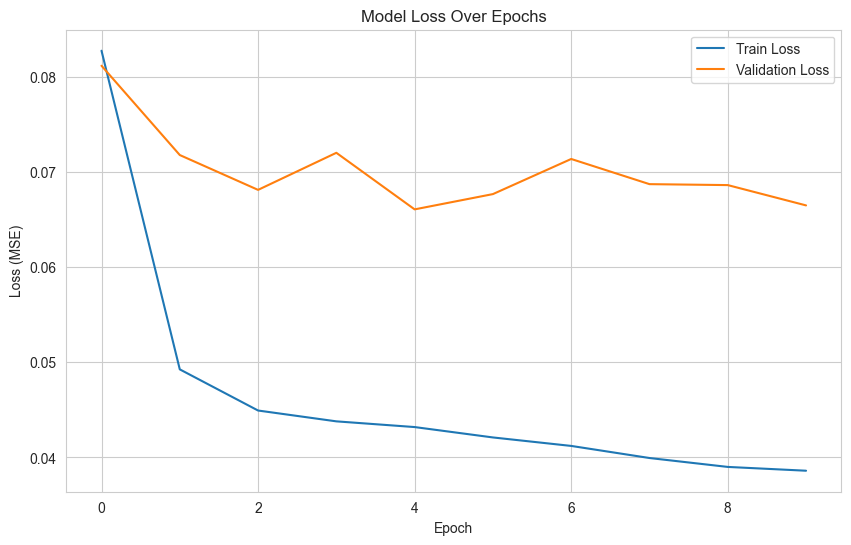

143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 48, 256)        │       148,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 938,885 (3.58 MB)

 Trainable params: 312,961 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 625,924 (2.39 MB)

--- Model Evaluation ---
✅ Final Validation RMSE: 0.26
✅ Comprehensive experiment details logged to: ../experiments/metrics/04_log.txt


In [3]:
# --- Experiment Parameters ---
EXP_ID = '04'
MODEL_TYPE = 'Stacked Bidirectional LSTM'
SCALER_TYPE = 'RobustScaler'
BATCH_SIZE = 64 # Using a larger batch size for a deeper model
MODEL_UNITS = [128, 64] # <-- A list defines a stacked architecture
MODEL_PATH = f'../experiments/{EXP_ID}_stacked_bilstm.keras'
LOG_PATH = f'../experiments/metrics/{EXP_ID}_log.txt'

# --- Run Workflow ---
# Build the stacked, Bidirectional model
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(
    input_shape, 
    units=MODEL_UNITS, # Pass the list of units
    bidirectional=True
)
model.summary()

# Train
history = train_model(model, X_train, y_train, X_val, y_val, MODEL_PATH, batch_size=BATCH_SIZE)

# Evaluate
final_rmse = evaluate_model(history, model, X_val, y_val)

# Log
log_experiment(
    model=model, history=history, rmse=final_rmse, log_path=LOG_PATH,
    exp_id=EXP_ID, model_type=MODEL_TYPE, sequence_length=N_PAST,
    batch_size=BATCH_SIZE, scaler_type=SCALER_TYPE, optimizer='adam',
    notes="Fourth experiment: Introduced a stacked (128, 64) Bidirectional LSTM and advanced features."
)